In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv  

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

#### EDA  

Load the data.
Look at the median_house_value variable. Does it have a long tail?  

#### Preparing the dataset  

For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
df = pd.read_csv(url)

<Axes: xlabel='median_house_value', ylabel='Count'>

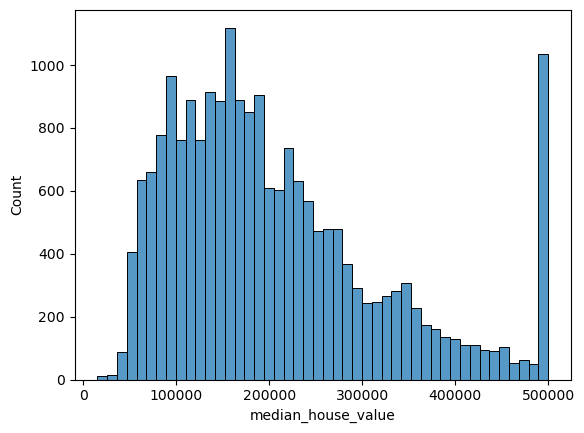

In [2]:
sns.histplot(df['median_house_value'])

#### The `median_house_vaue` does not have a long tail going by the image above

In [3]:
df_new = df[df['ocean_proximity'].isin(['<1H OCEAN' or 'INLAND'])]
df_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,<1H OCEAN
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1H OCEAN
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1H OCEAN


In [4]:
df_new = df_new[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

In [5]:
df_new

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20502,34.33,-118.68,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0
20503,34.33,-118.75,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0
20504,34.29,-118.73,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0
20505,34.29,-118.72,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0


## Question 1

* There's one feature with missing values. What is it?

In [6]:
# Obtain the total number of missing values in each fearure

df_new.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        102
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#### Total bedroom is the only feature with missing values

## Question 2
* What's the median (50% percentile) for variable `population`

In [7]:
# Obtain median of the population

df_new['population'].median()

1247.0

#### The population in question is 1247 on the average (median)

## Question 3 (Prepare and split the dataset)

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [11]:
# Dataset Shuffling

n = len(df_new)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_new_shuffled = df_new.iloc[idx]

In [12]:
df_new_shuffled

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3925,34.18,-118.56,36.0,1366.0,224.0,719.0,270.0,4.8264,251000.0
922,37.53,-121.92,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,451100.0
7643,33.82,-118.27,33.0,1596.0,337.0,1650.0,329.0,4.3687,173500.0
4730,34.05,-118.36,48.0,1835.0,380.0,956.0,370.0,3.2813,243600.0
7334,33.98,-118.18,40.0,1698.0,431.0,1280.0,405.0,2.6250,206300.0
...,...,...,...,...,...,...,...,...,...
10487,33.49,-117.68,17.0,2232.0,372.0,1072.0,385.0,4.2450,214500.0
9508,39.15,-123.22,45.0,1348.0,265.0,639.0,270.0,3.3667,115200.0
10111,33.94,-117.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0
4077,34.15,-118.35,52.0,1680.0,238.0,493.0,211.0,9.0420,500001.0


In [13]:
# Dataset Splitting and Transformation

df_val = df_new_shuffled.iloc[idx[:n_val]].reset_index(drop = True)
df_train = df_new_shuffled.iloc[idx[n_val:n_val+n_train]].reset_index(drop = True)
df_test = df_new_shuffled.iloc[idx[n_val+n_train:]].reset_index(drop = True)


y_val = np.log1p(df_val.median_house_value.values)
y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)


del df_val['median_house_value']
del df_train['median_house_value']
del df_test['median_house_value']

## Question 4
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.  
Try both options. 

* For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)  
Which option gives better RMSE?

In [15]:
def linear_reg(X, y):
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def prep_data(df, a):
    df = df.fillna(a)
    X = df.values
    return X

def RMSE(y, y_pred):
    mse = np.square(y_pred - y).mean()
    return np.sqrt(mse)

#### Filling missing values with mean and training a linear reg and obtaining an error

In [16]:
mean_ = df_train['total_bedrooms'].mean()

X_train = prep_data(df_train, mean_)
w_0, w = linear_reg(X_train, y_train)

X_val = prep_data(df_val, mean_)
y_pred = w_0 + X_val.dot(w)

RMSE(y_val, y_pred).round(2)

0.29

#### Filling missing values with 0 and training a linear reg and obtaining an error

In [17]:
X_train = prep_data(df_train, 0)
w_0, w = linear_reg(X_train, y_train)

X_val = prep_data(df_val, 0)
y_pred = w_0 + X_val.dot(w)

RMSE(y_val, y_pred).round(2)

0.29

#### Both options are good as they give approximately same answers

## Question 5

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

In [18]:
def linear_reg_regu(X, y, r = 0.0):
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])
    XTX = X.T.dot(X)
    regu = r * np.ones(XTX.shape[0])
    XTX = XTX + regu
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [19]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    X_train = prep_data(df_train, 0)
    w_0, w = linear_reg_regu(X_train, y_train, r=r)
    
    X_val = prep_data(df_val, 0)
    y_pred = w_0 + X_val.dot(w)
    
    rmse = RMSE(y_val, y_pred)
    

    print('%06s %0.5f' % (r, rmse))

     0 0.29282
 1e-06 0.29282
0.0001 0.29281
 0.001 0.29279
  0.01 0.29263
   0.1 0.29219
     1 0.29205
     5 0.29204
    10 0.29203


## Question 7

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [37]:
rmse = []
std = []

for s in range(10):
    n = len(df_new)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_new_shuffled = df_new.iloc[idx]
    
    df_val = df_new_shuffled.iloc[idx[:n_val]].reset_index(drop = True).copy()
    df_train = df_new_shuffled.iloc[idx[n_val:n_val+n_train]].reset_index(drop = True).copy()
    df_test = df_new_shuffled.iloc[idx[n_val+n_train:]].reset_index(drop = True).copy()


    y_val = np.log1p(df_val.median_house_value.values)
    y_train = np.log1p(df_train.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)


    del df_val['median_house_value']
    del df_train['median_house_value']
    del df_test['median_house_value']
    
    X_train = prep_data(df_train, 0)
    w_0, w = linear_reg(X_train, y_train)
    
    X_val = prep_data(df_val, 0)
    y_pred = w_0 + X_val.dot(w)
    
    print(s, RMSE(y_val, y_pred))
    rmse.append(RMSE(y_val, y_pred))
    
    
    


0 0.29391928344729357
1 0.2962275277953512
2 0.290023440000043
3 0.297872937056701
4 0.2977506715643992
5 0.29075964315981784
6 0.2955059042091997
7 0.2893764833655482
8 0.28880099649472085
9 0.30985012968844683


In [40]:
std = np.std(rmse).round(3)
std

0.006

## Question 6  
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [42]:
n = len(df_new)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_new_shuffled = df_new.iloc[idx]
    
df_val = df_new_shuffled.iloc[idx[:n_val]].reset_index(drop = True).copy()
df_train = df_new_shuffled.iloc[idx[n_val:n_val+n_train]].reset_index(drop = True).copy()
df_test = df_new_shuffled.iloc[idx[n_val+n_train:]].reset_index(drop = True).copy()


y_val = np.log1p(df_val.median_house_value.values)
y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)


del df_val['median_house_value']
del df_train['median_house_value']
del df_test['median_house_value']
    
X_train = prep_data(df_train, 0)
w_0, w = linear_reg_regu(X_train, y_train, r = 0.001)
    
X_test = prep_data(df_test, 0)
y_pred = w_0 + X_test.dot(w)
    
print(RMSE(y_test, y_pred))
    

0.2922182084583988
